In [1]:
import gym
import numpy as np
from ddpg_agent import Agent
import time
import matplotlib.pyplot as plt

In [3]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")
    agent = Agent(input_dims=(env.observation_space.shape), n_actions=env.action_space.shape[0], alpha=0.001, beta=0.002,
                  env=env, gamma=0.99, mem_size=50000, tau=0.005, fc1_dims=400, fc2_dims=300, batch_size=64)
    n_games = 501

    best_score = env.reward_range[0]
    score_history = []

        

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))

episode 0 score -886.0 avg score -886.0
episode 1 score -1855.7 avg score -1370.8
episode 2 score -1170.2 avg score -1304.0
episode 3 score -1093.6 avg score -1251.4
episode 4 score -1015.2 avg score -1204.1
episode 5 score -1082.0 avg score -1183.8
episode 6 score -1104.6 avg score -1172.5
episode 7 score -1178.2 avg score -1173.2
episode 8 score -1266.9 avg score -1183.6
episode 9 score -1053.2 avg score -1170.5
episode 10 score -1612.4 avg score -1210.7
episode 11 score -1803.6 avg score -1260.1
episode 12 score -1392.0 avg score -1270.3
episode 13 score -1204.2 avg score -1265.5
episode 14 score -1195.6 avg score -1260.9
episode 15 score -1159.2 avg score -1254.5
episode 16 score -1163.4 avg score -1249.2
episode 17 score -1043.7 avg score -1237.8
episode 18 score -976.9 avg score -1224.0
episode 19 score -1078.6 avg score -1216.8
episode 20 score -899.6 avg score -1201.6
episode 21 score -747.5 avg score -1181.0
episode 22 score -1772.4 avg score -1206.7
episode 23 score -1700.6 a

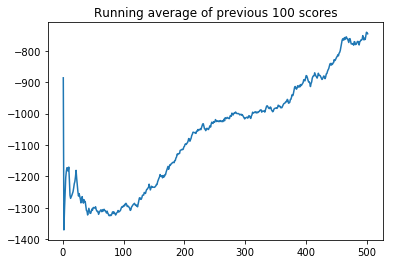

In [4]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)